In [21]:
from Bio import Phylo
from ete3 import Tree
import toytree
import toyplot.svg
import os
import matplotlib.pyplot as plt

/tmp/ipykernel_31163/2086560164.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(15, 15))


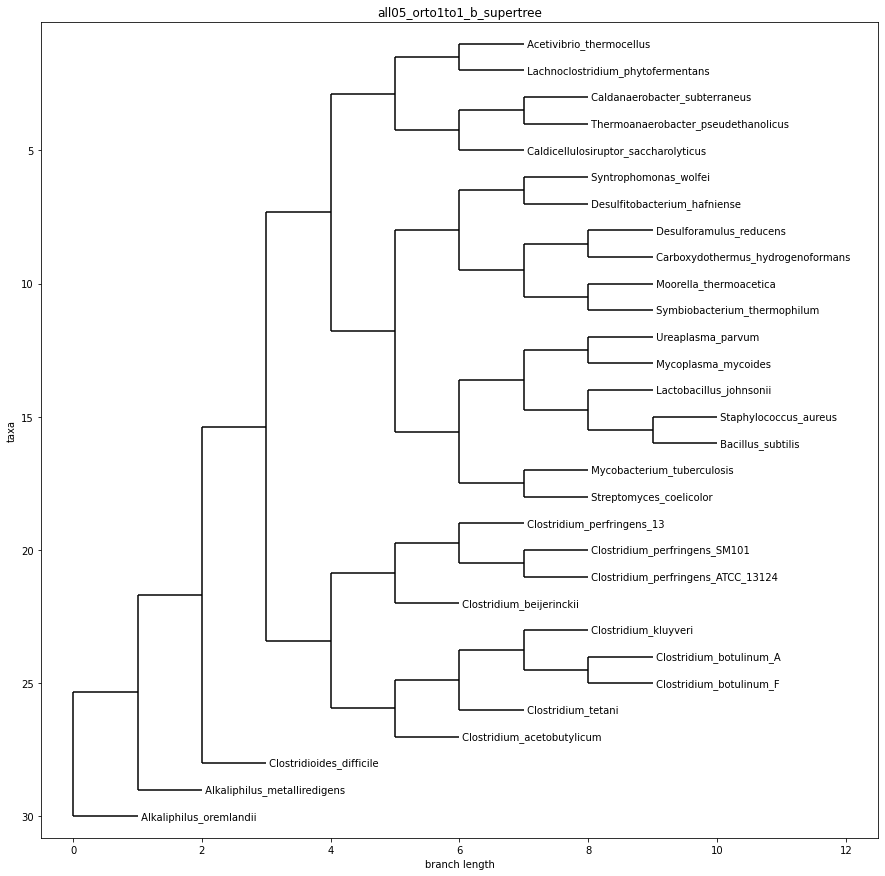

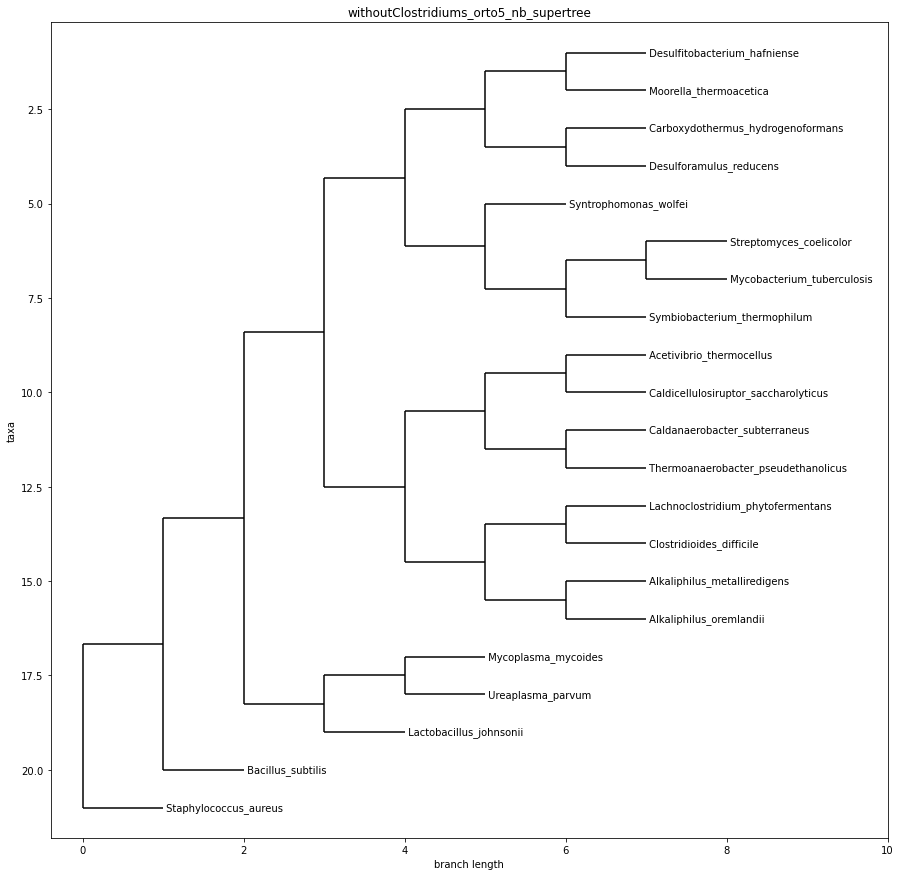

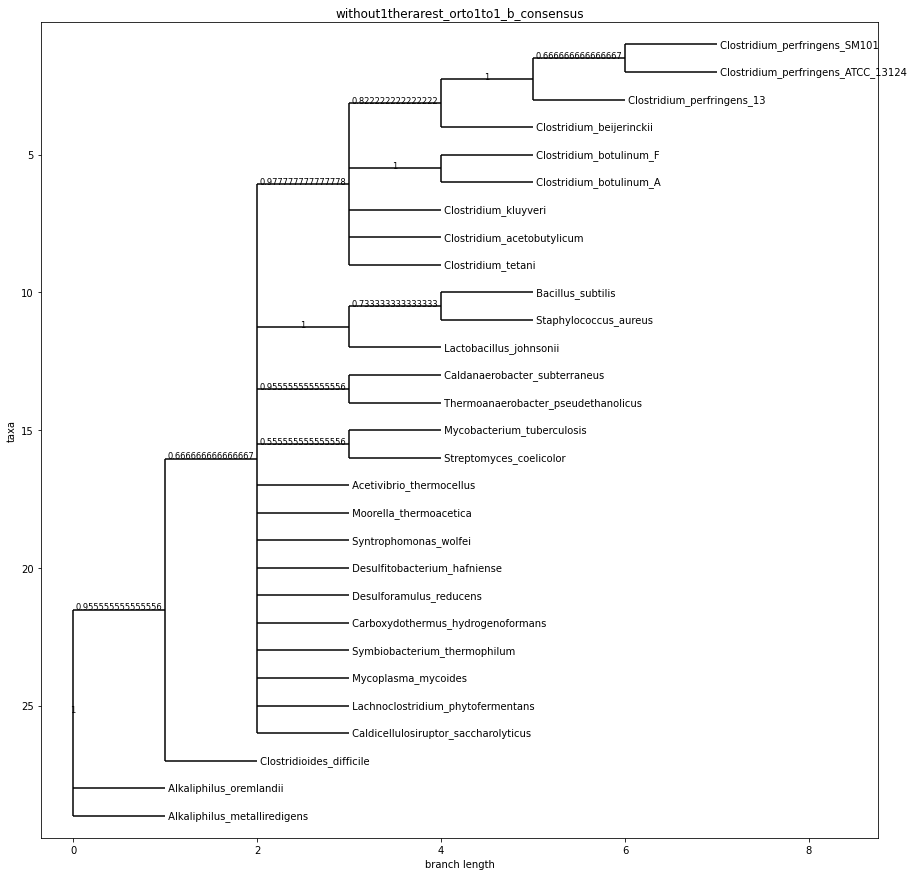

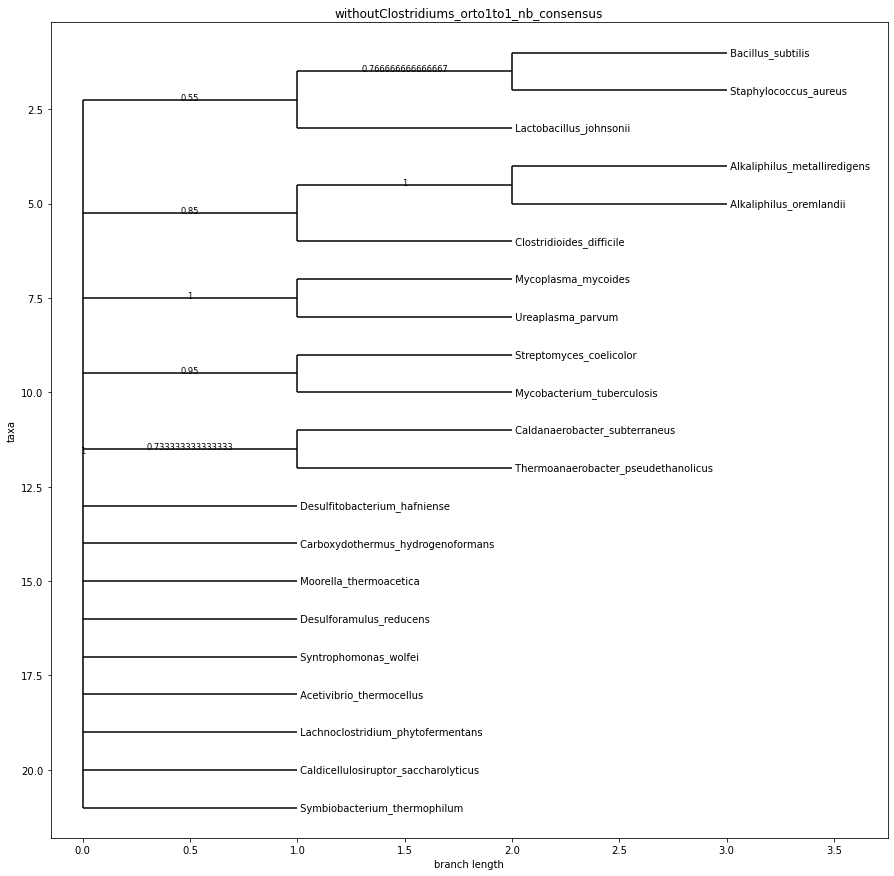

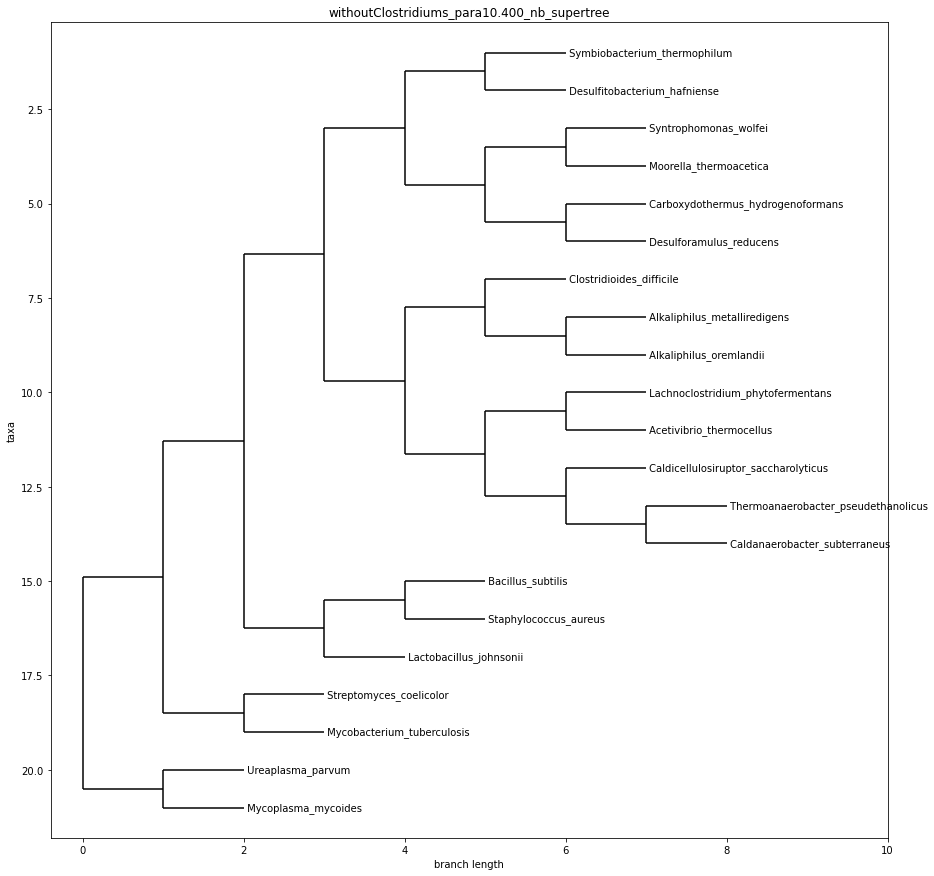

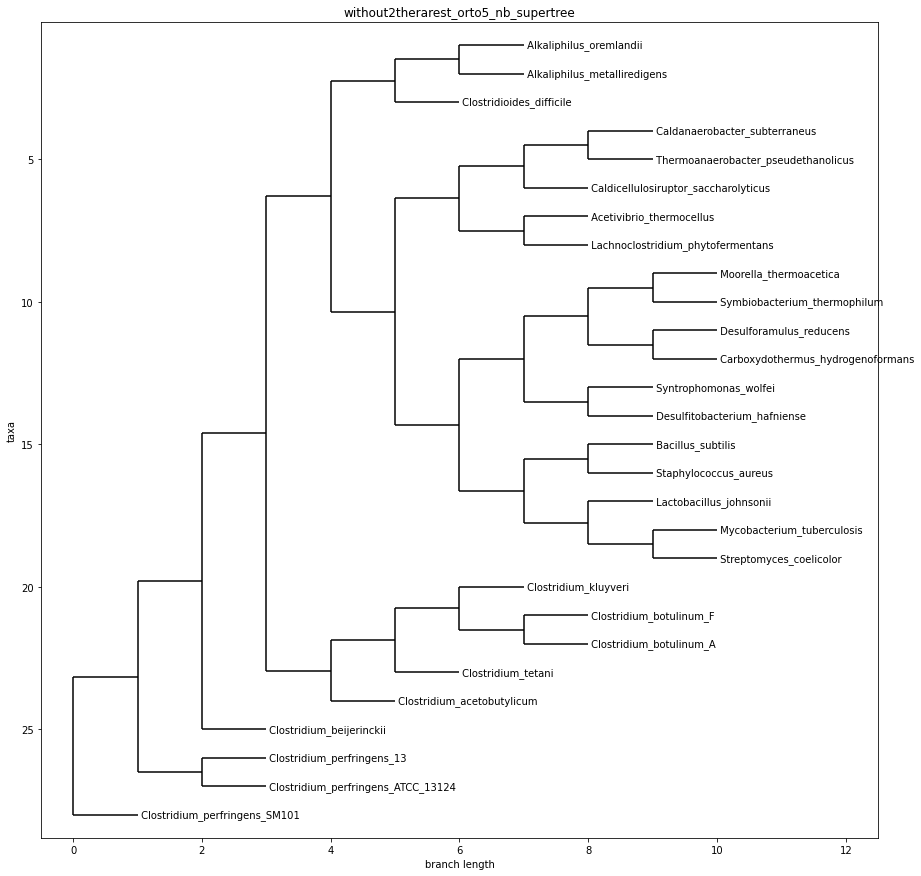

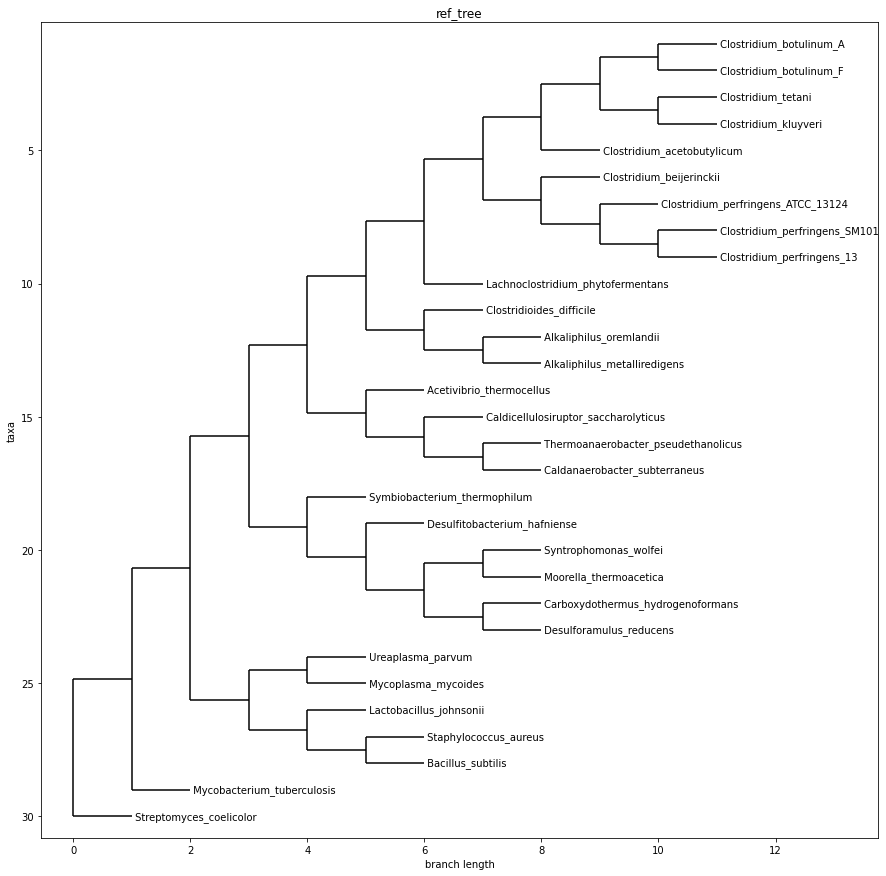

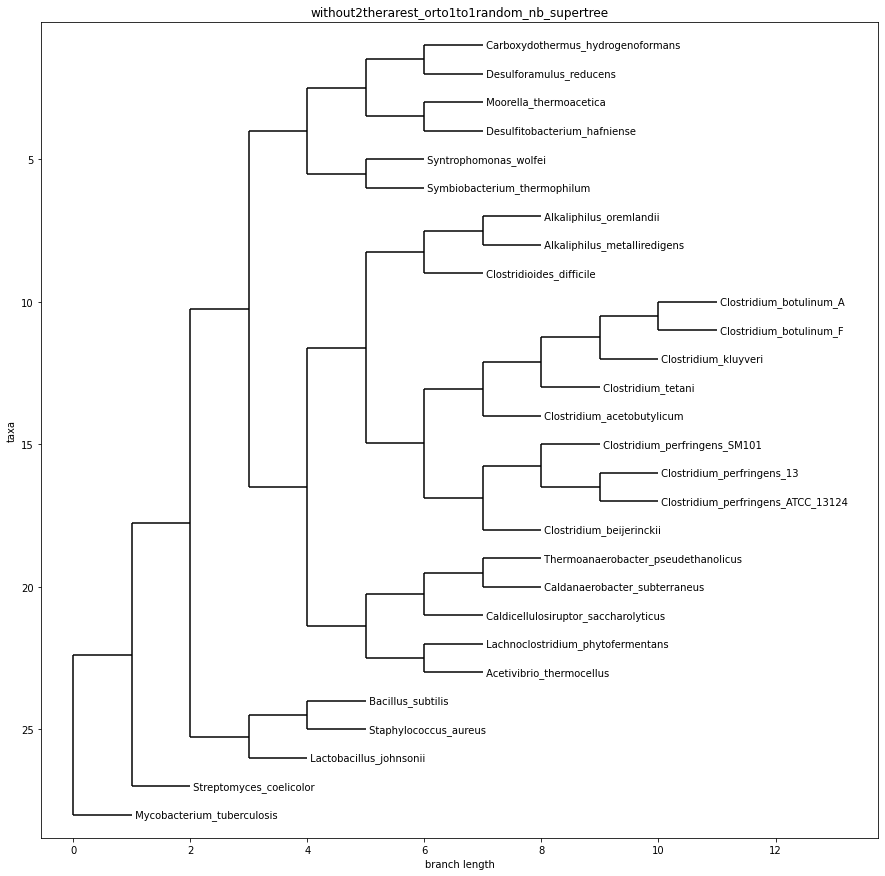

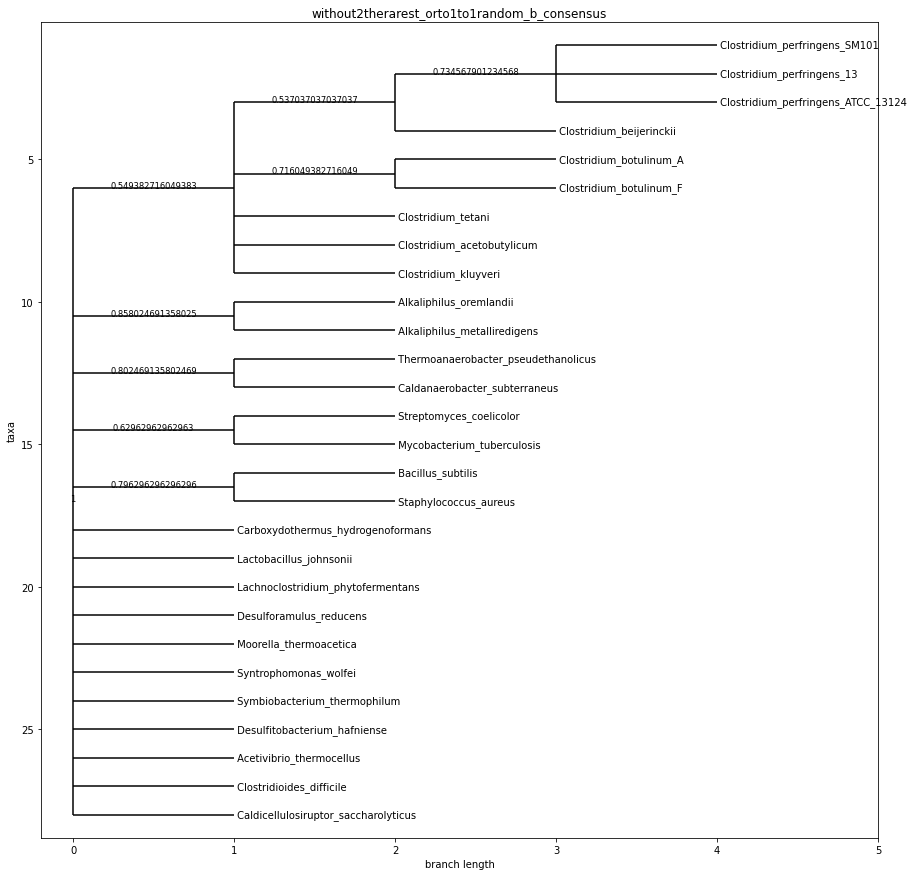

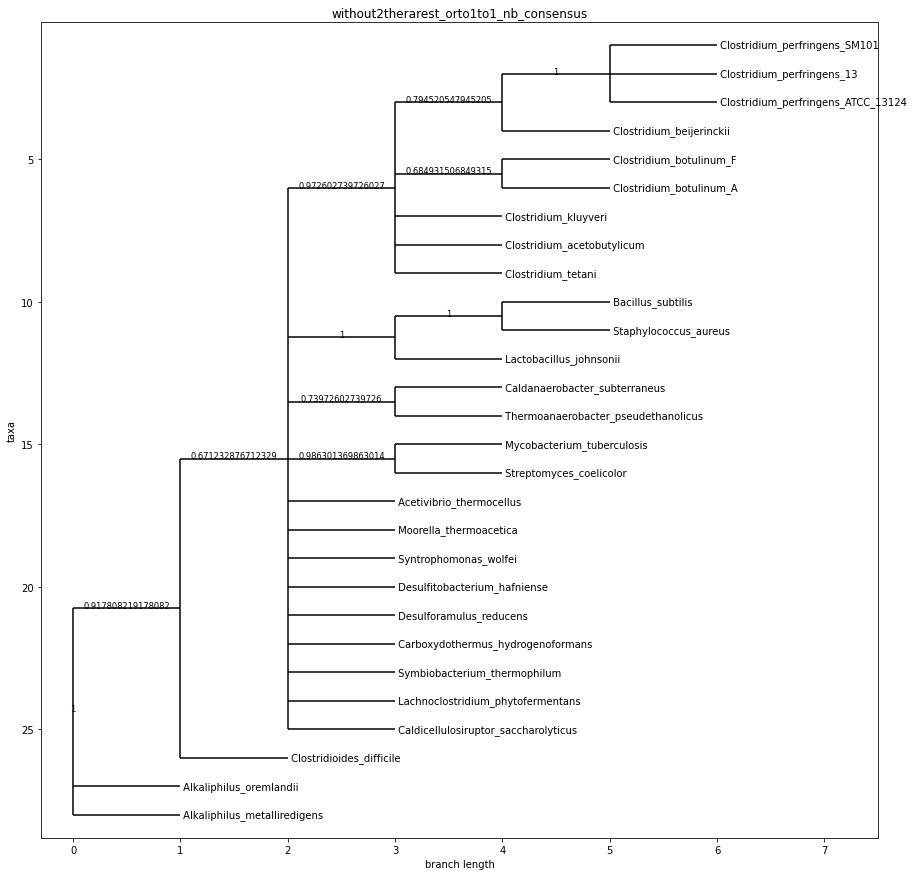

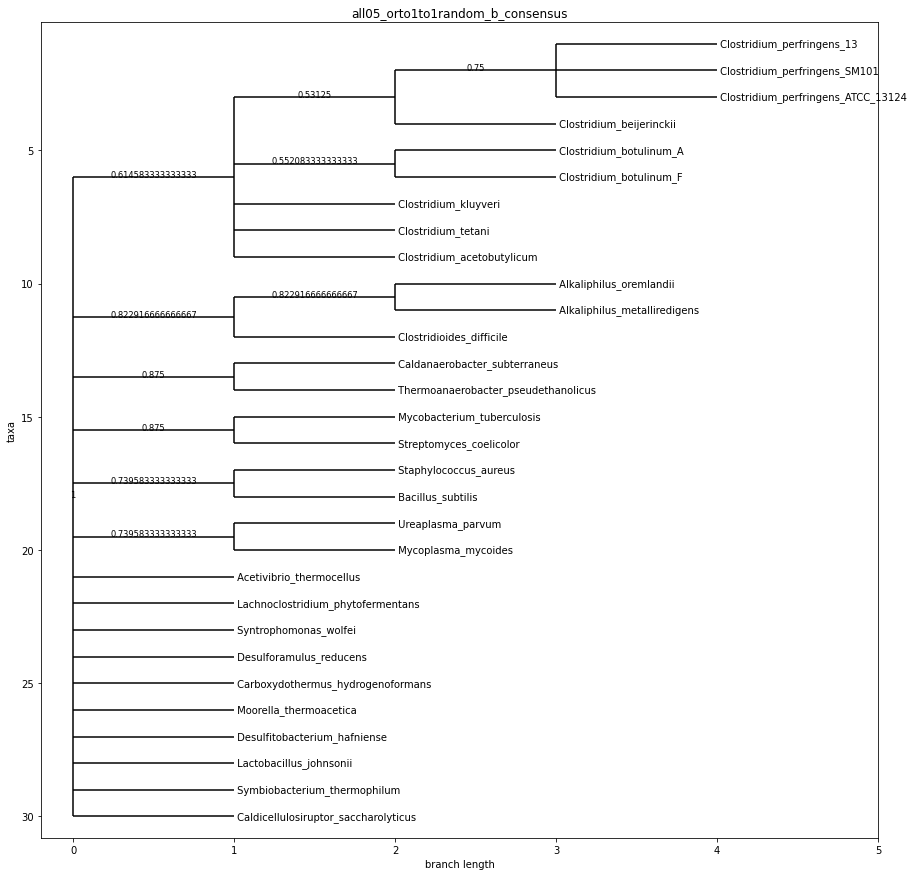

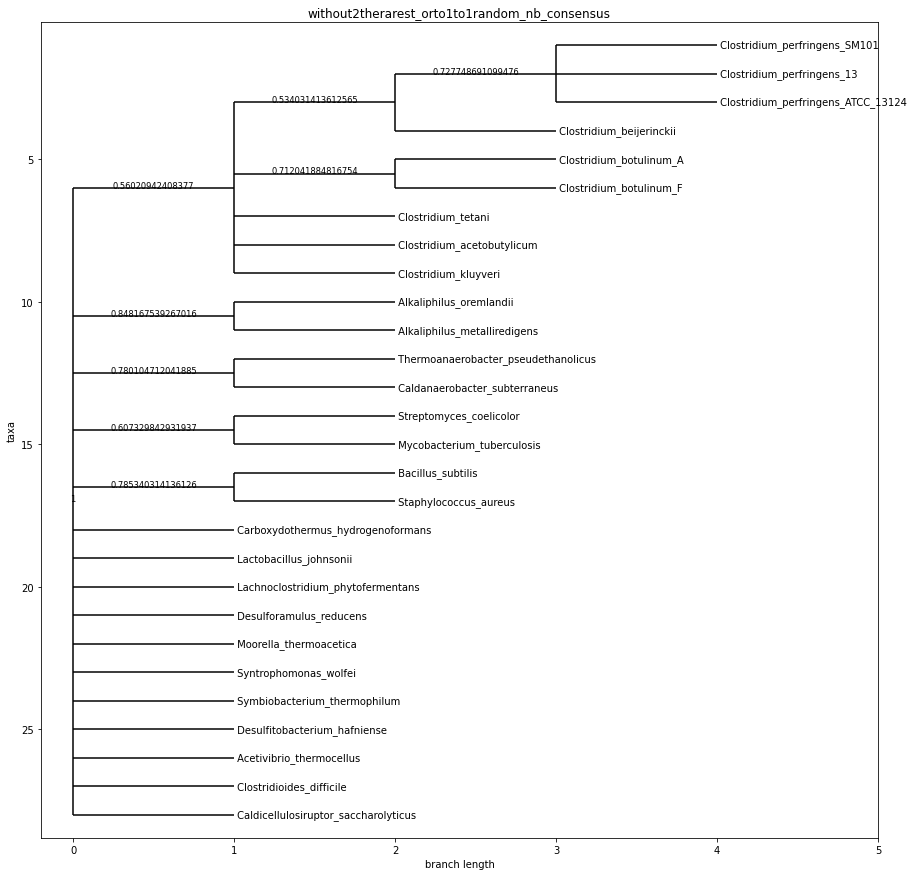

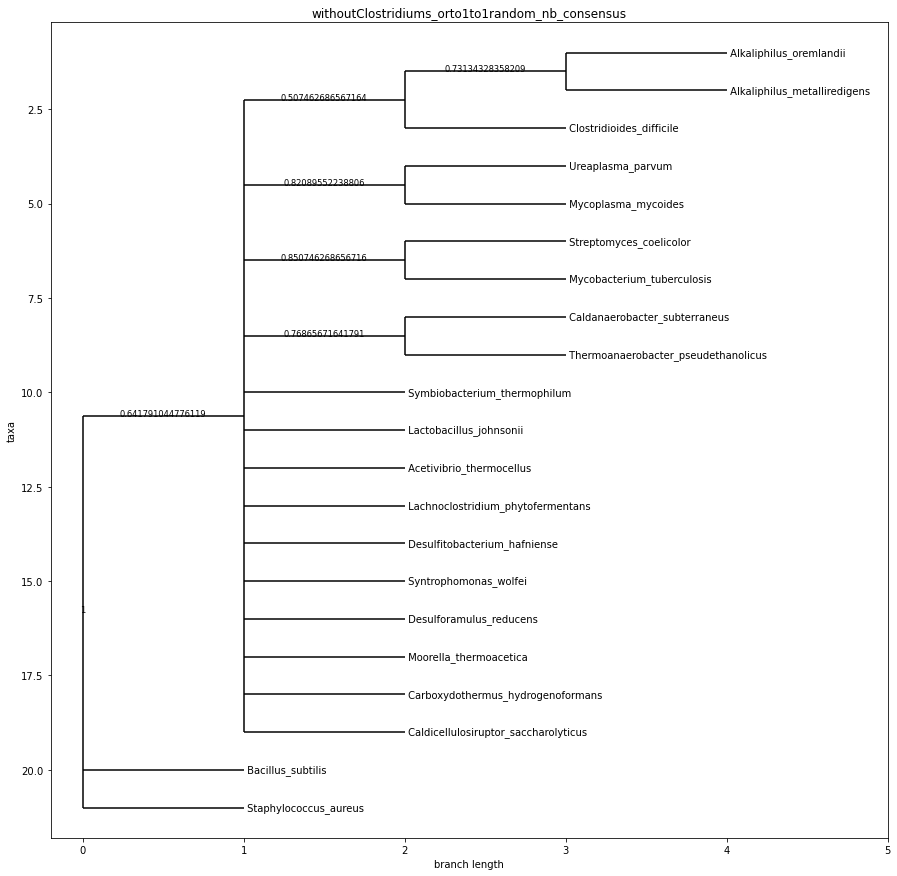

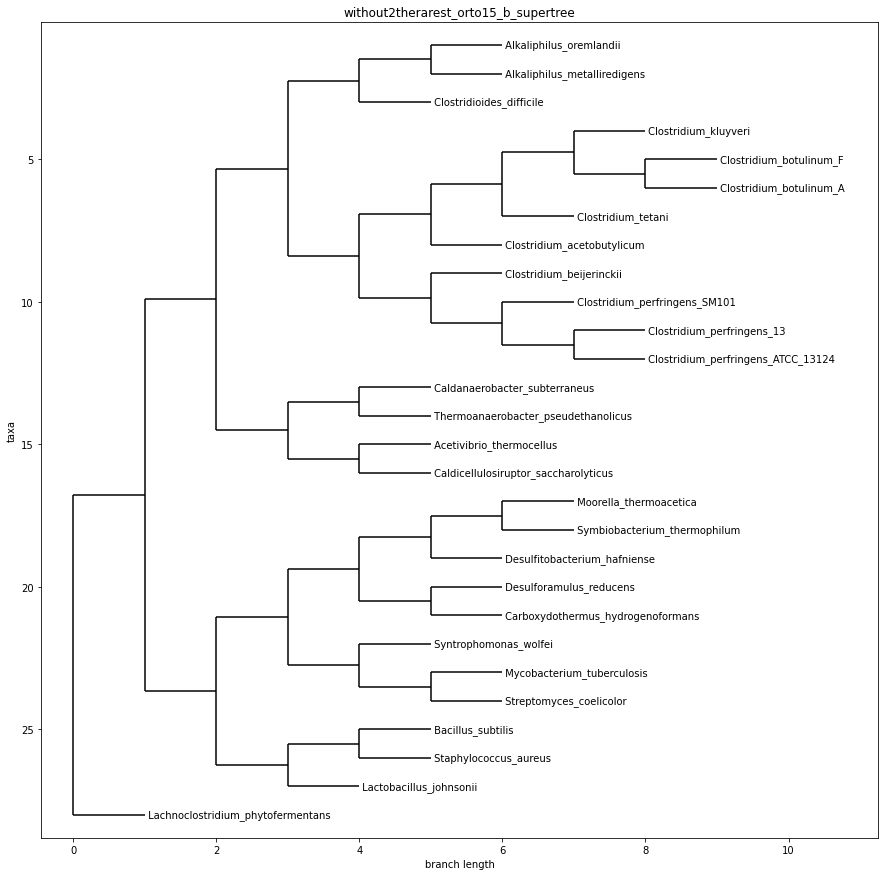

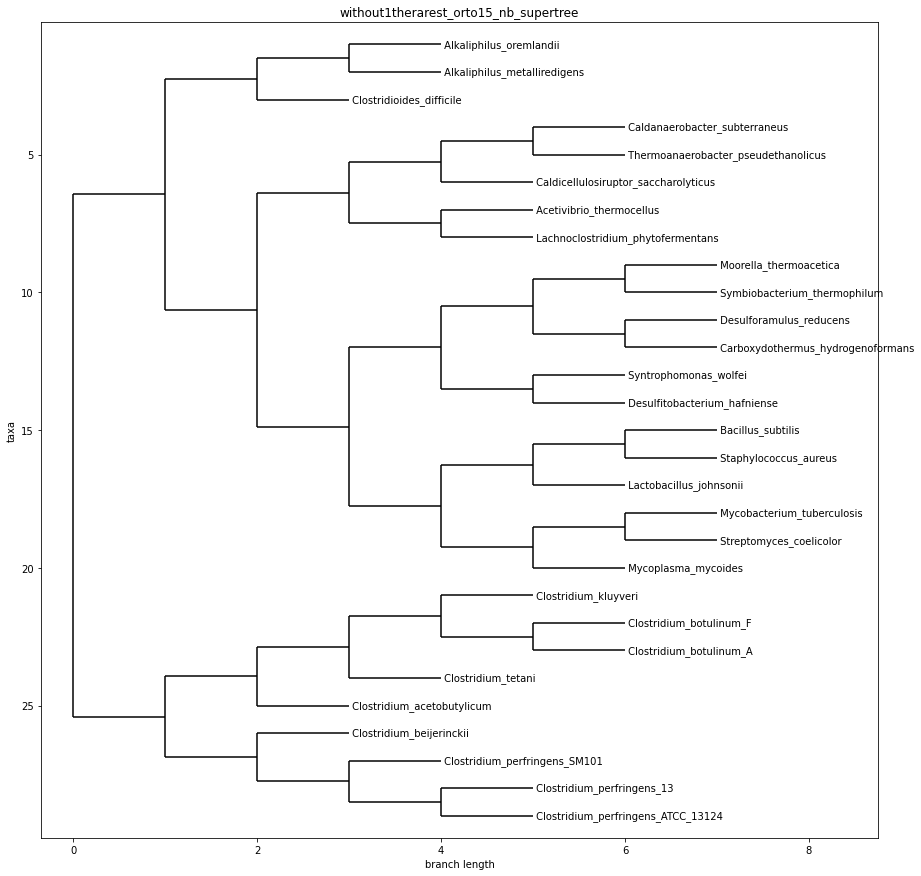

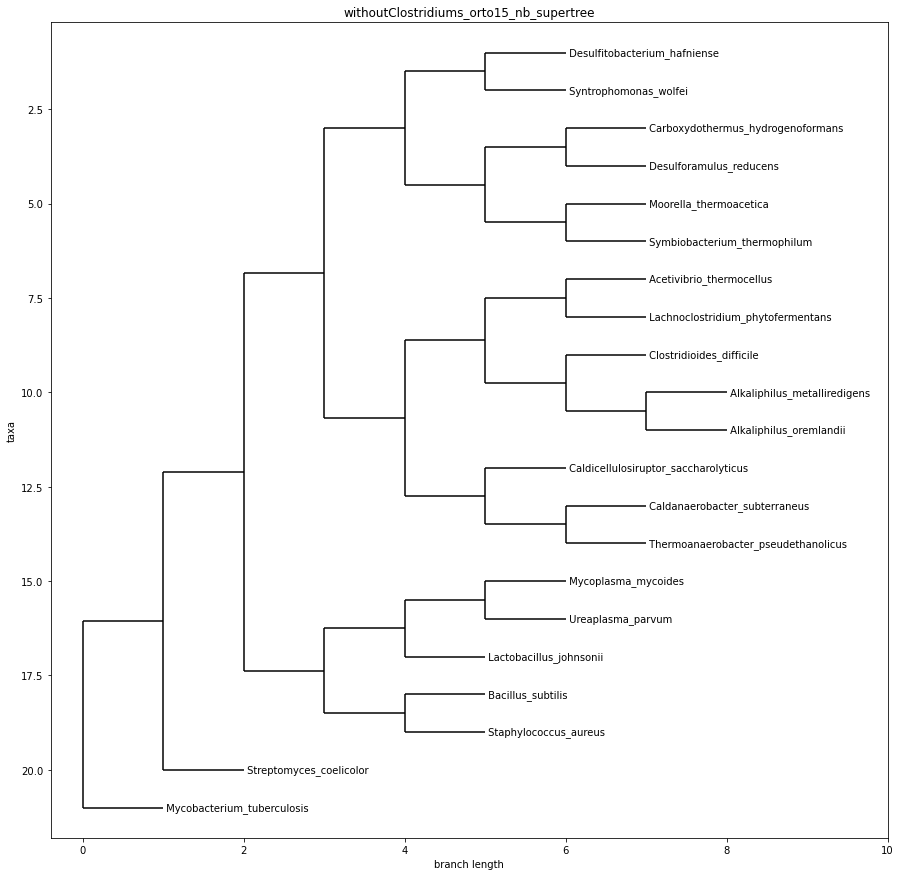

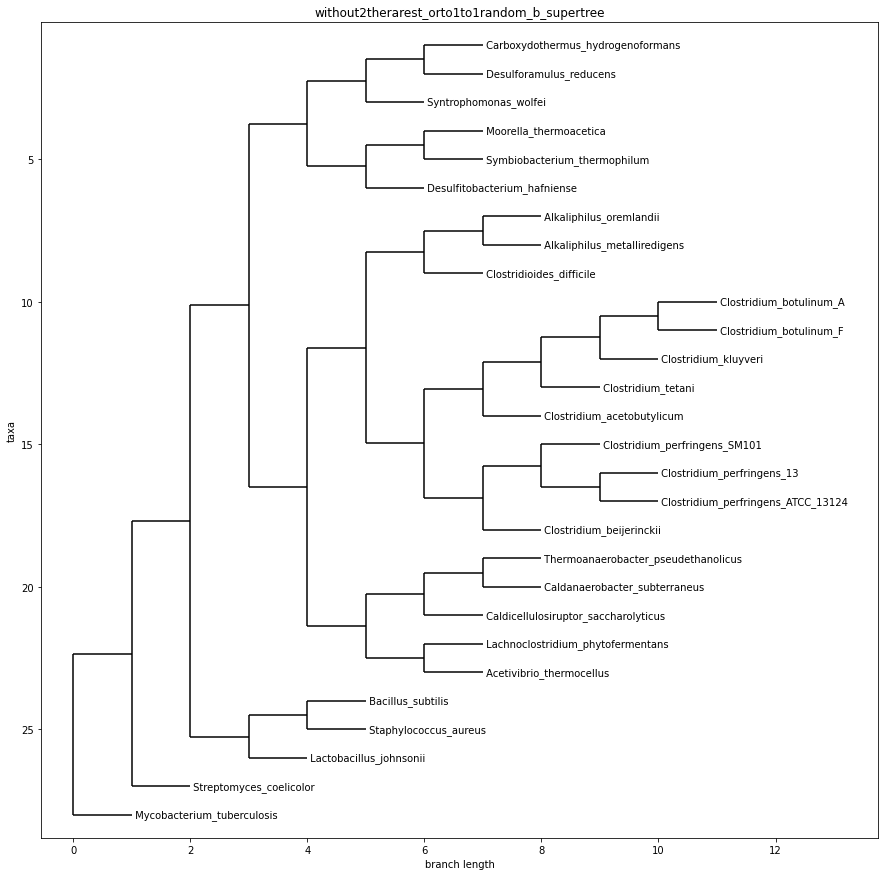

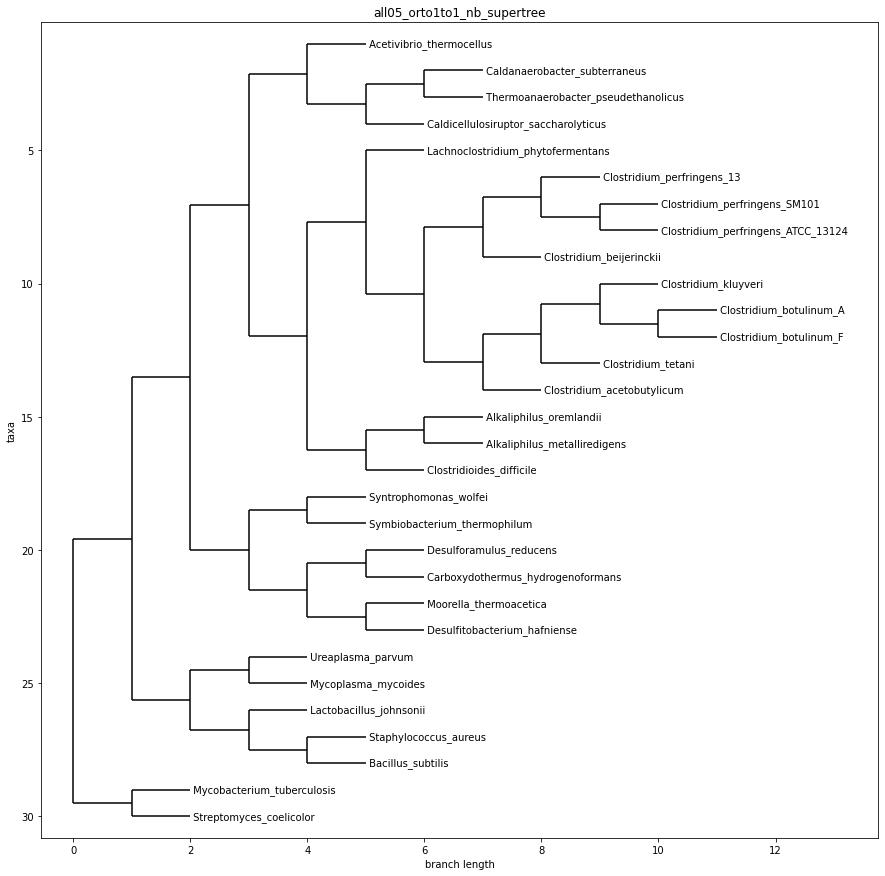

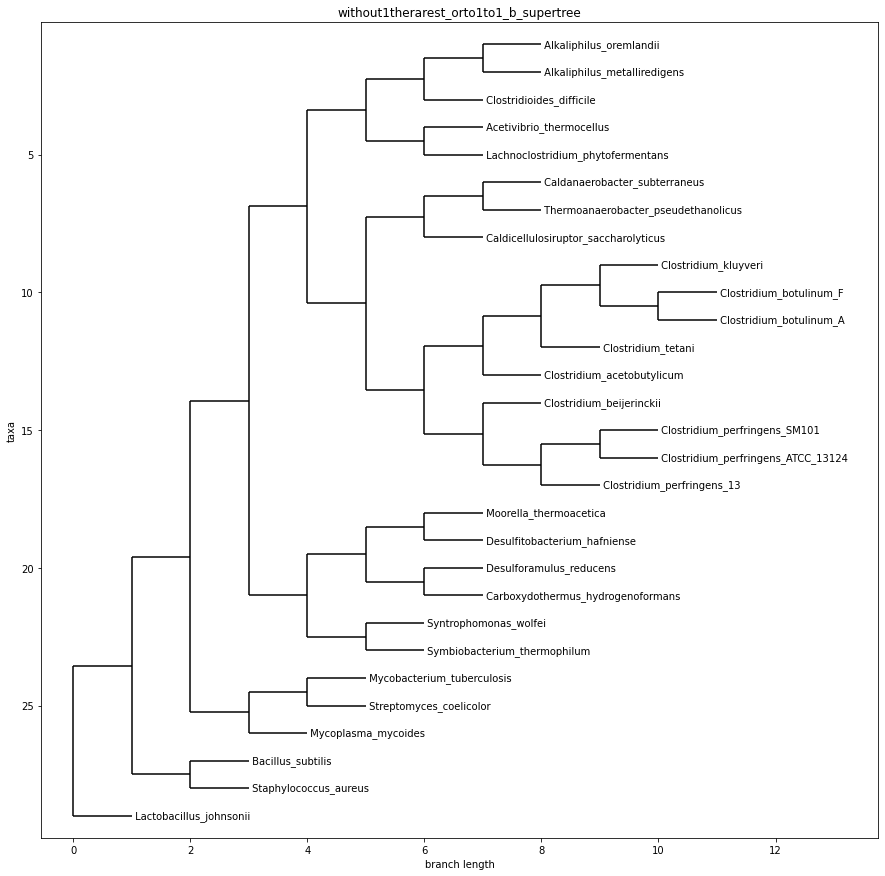

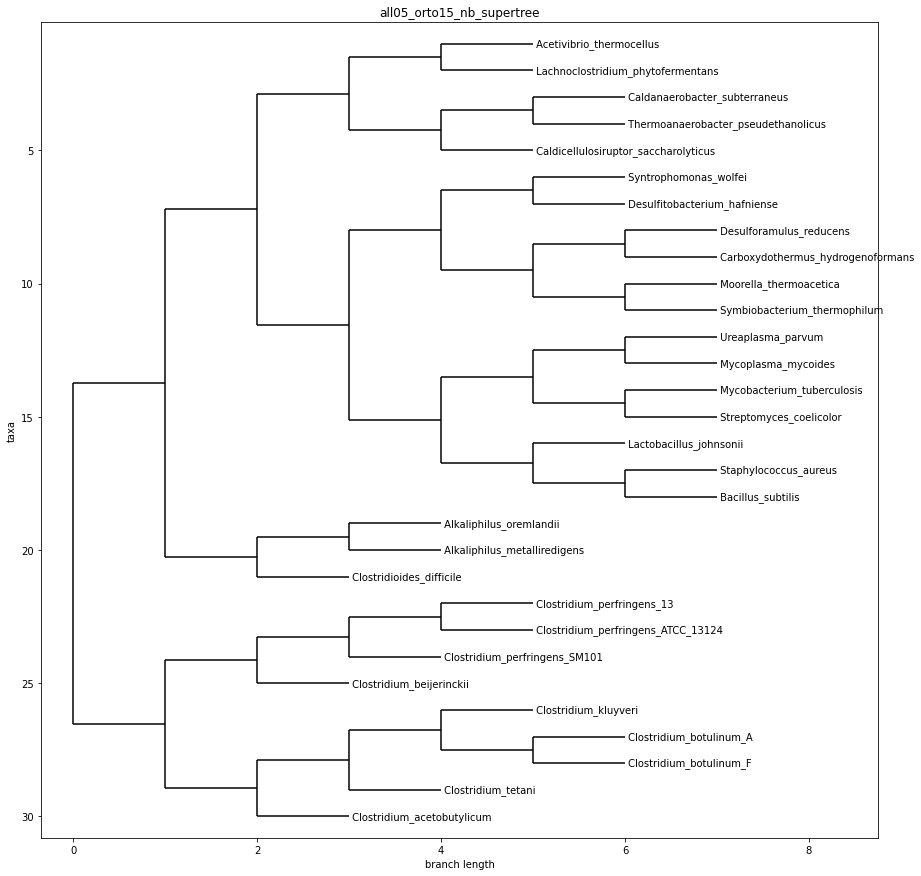

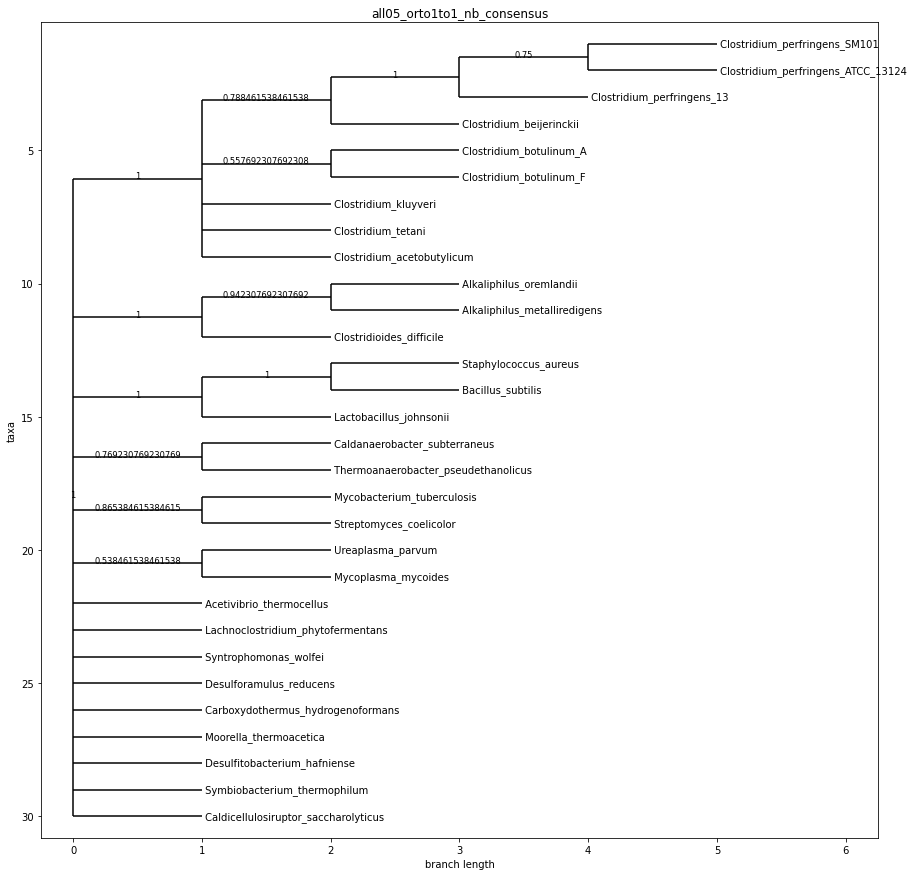

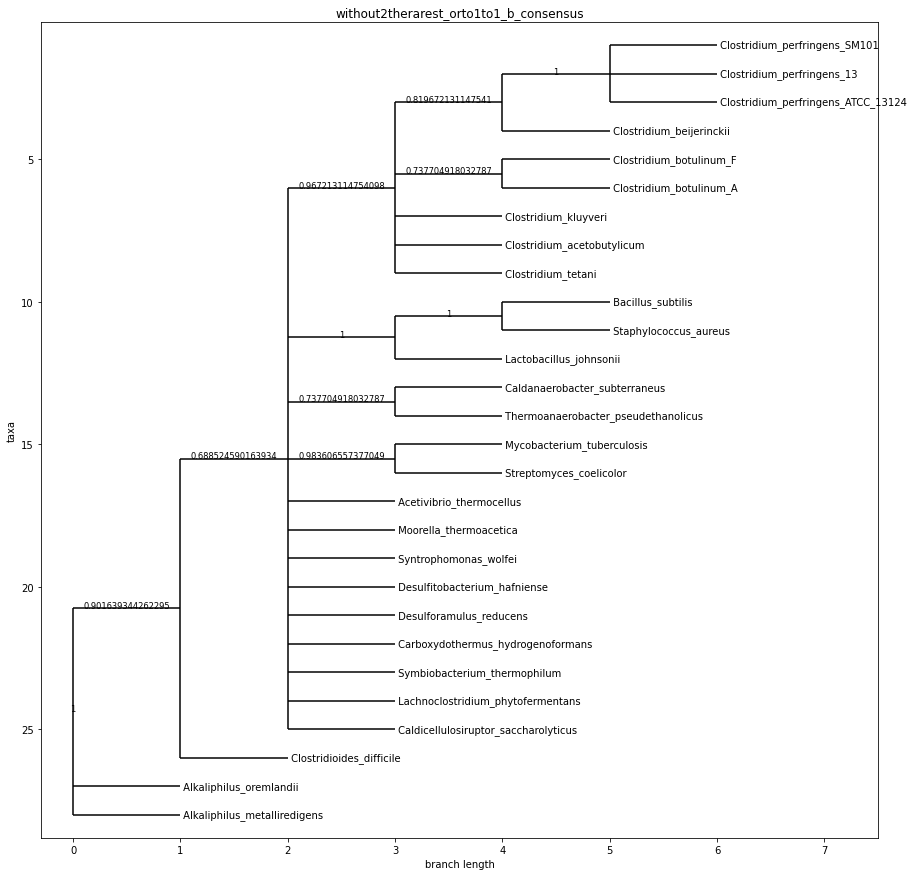

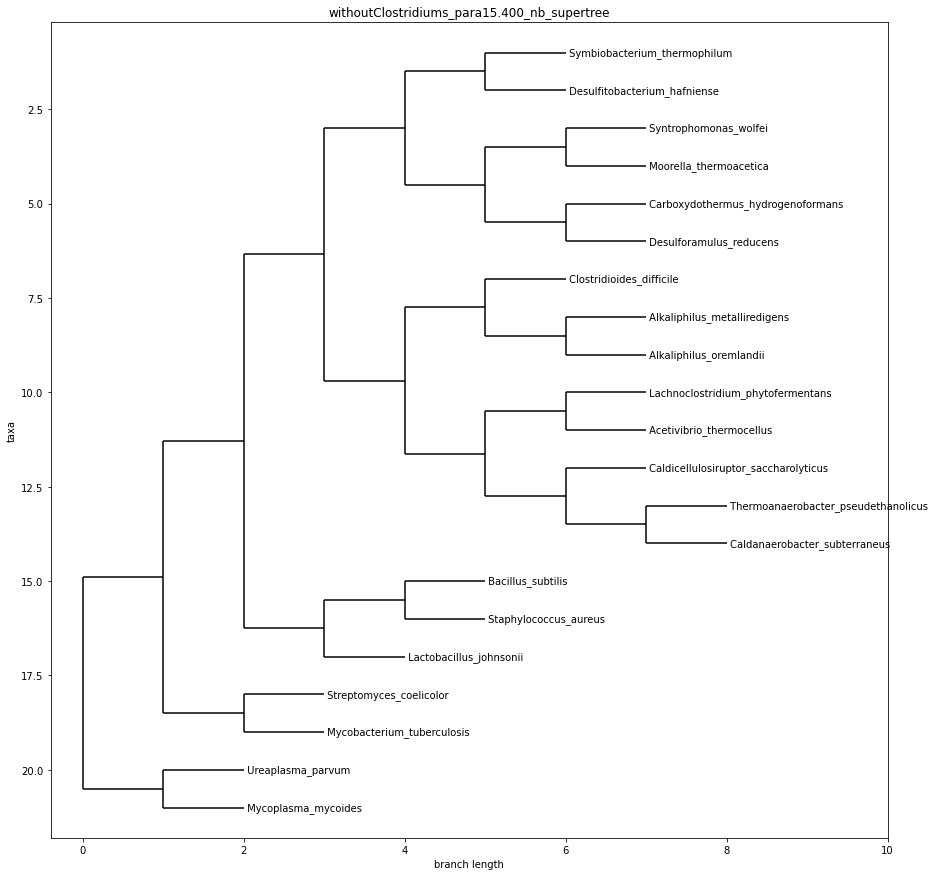

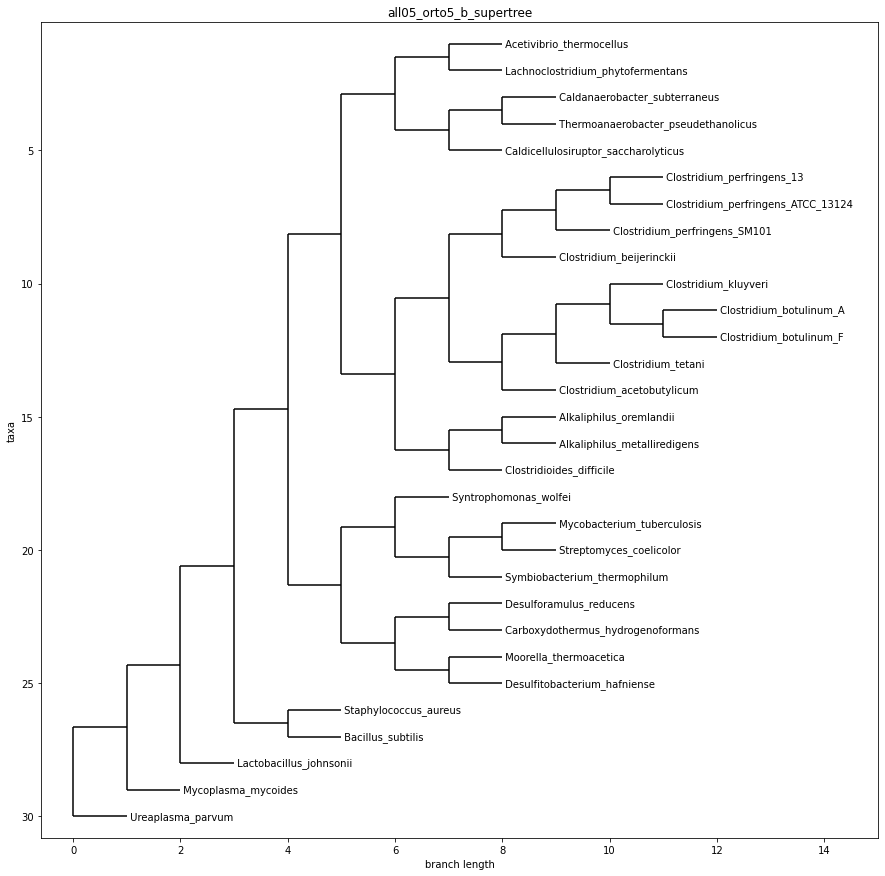

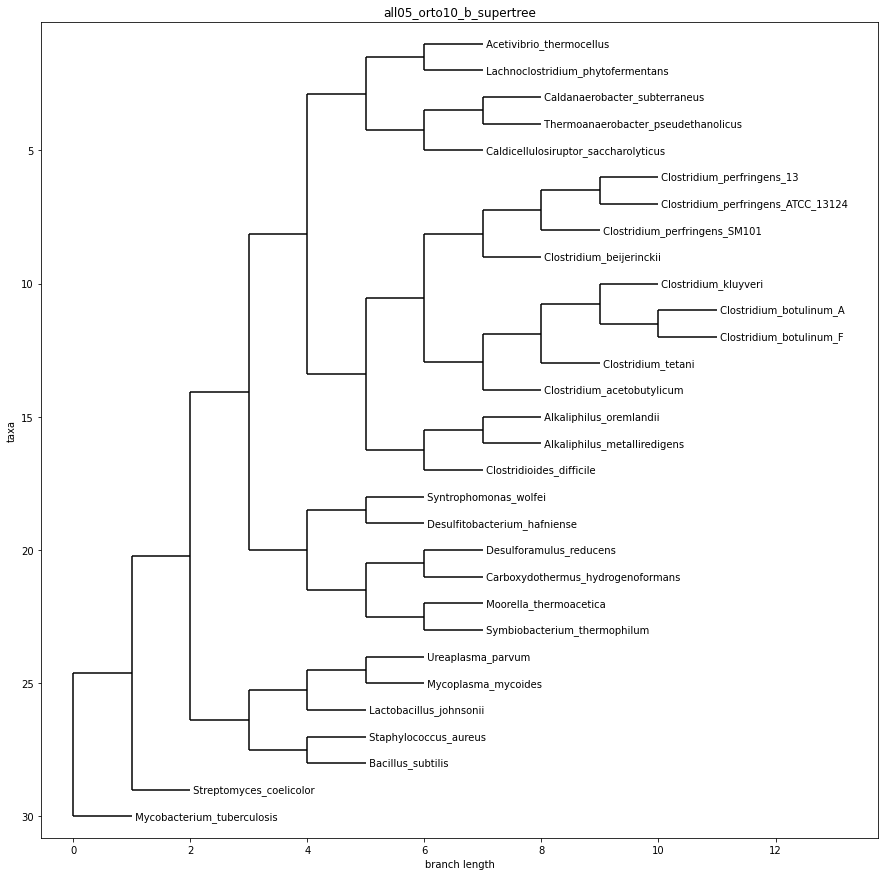

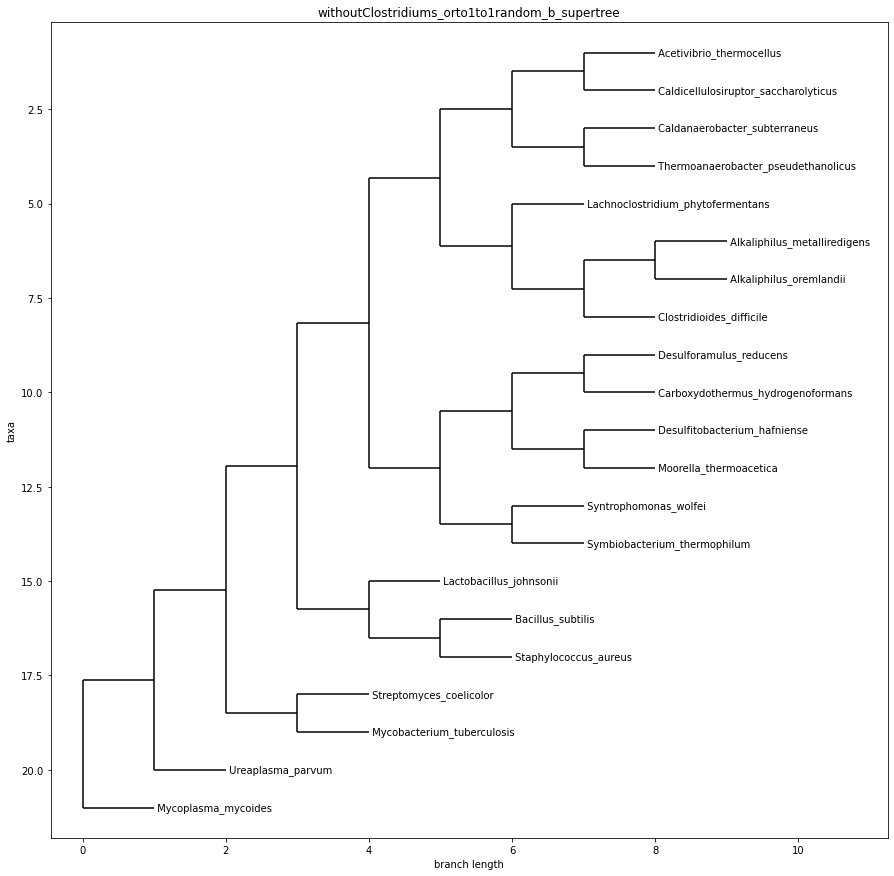

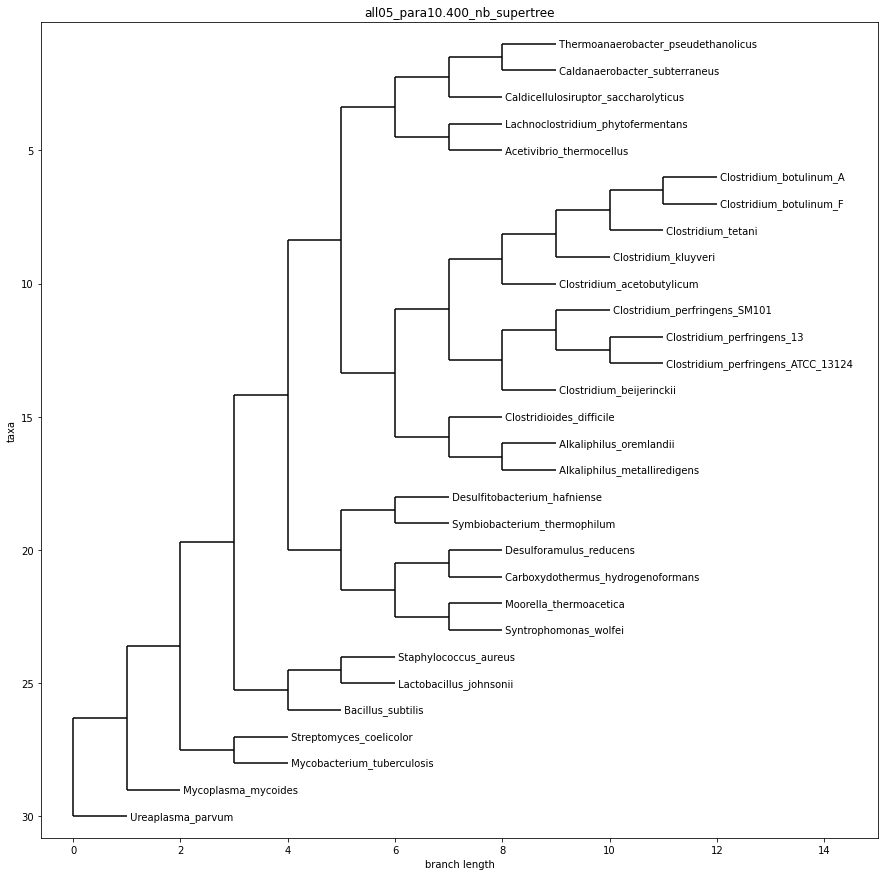

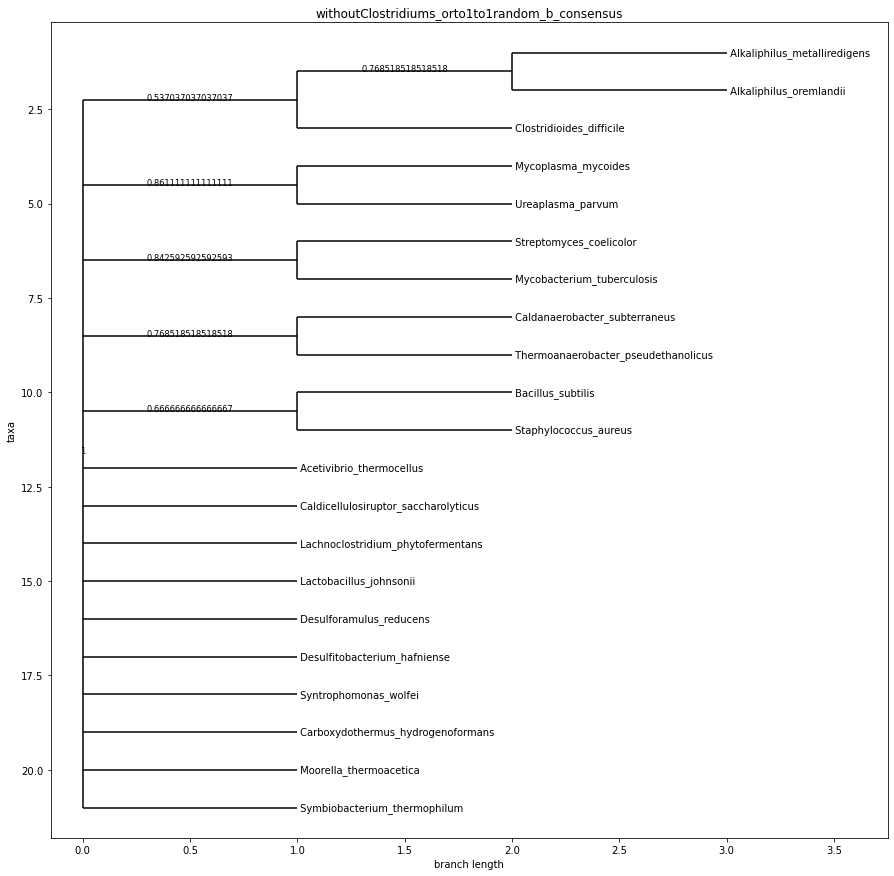

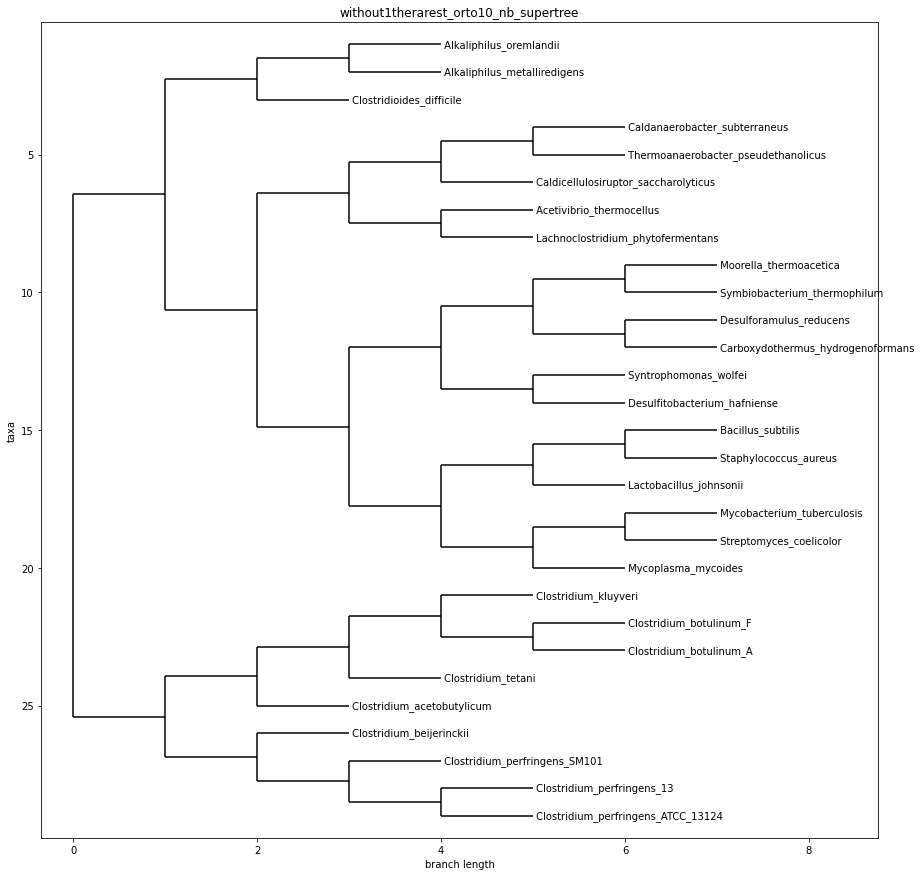

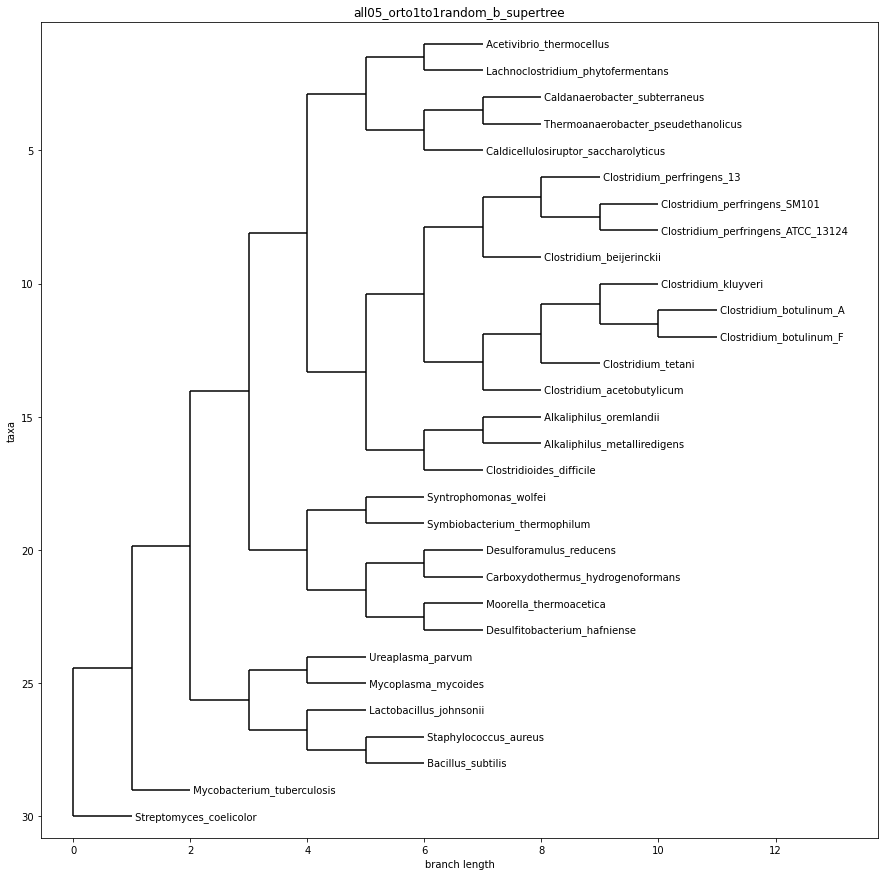

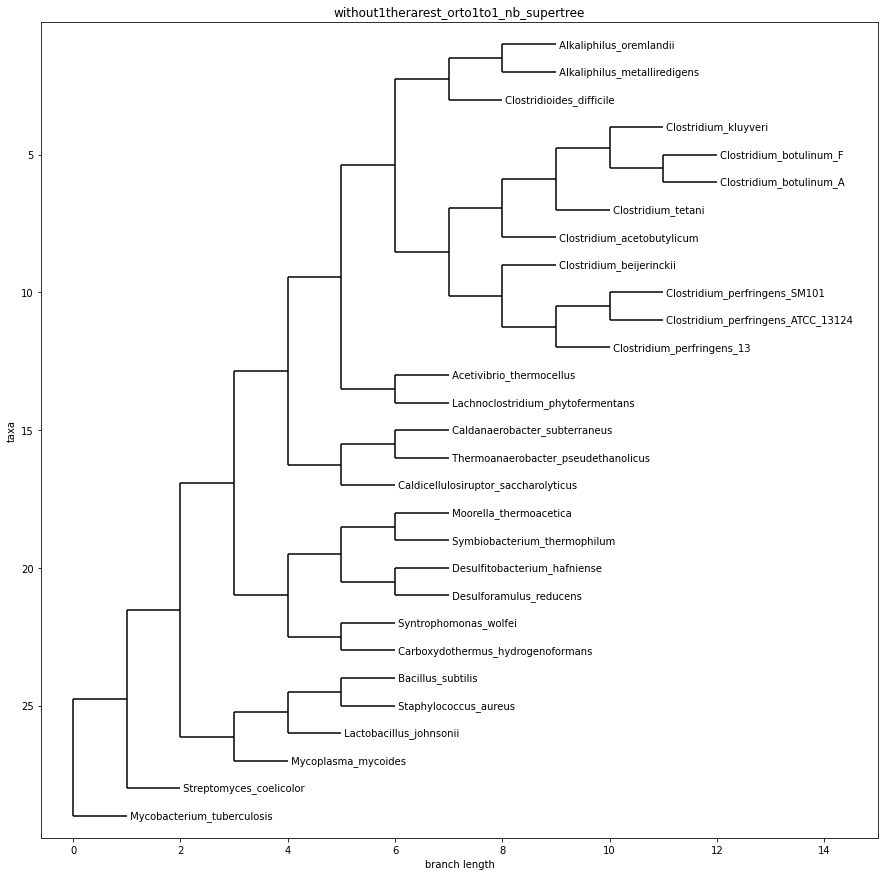

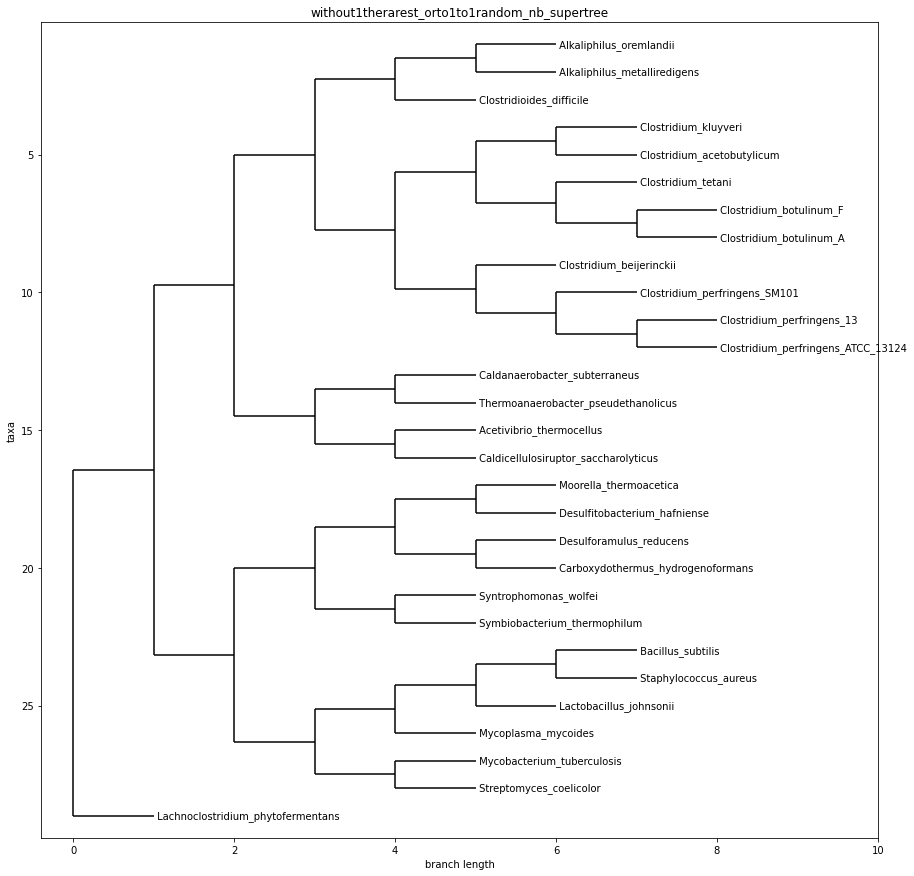

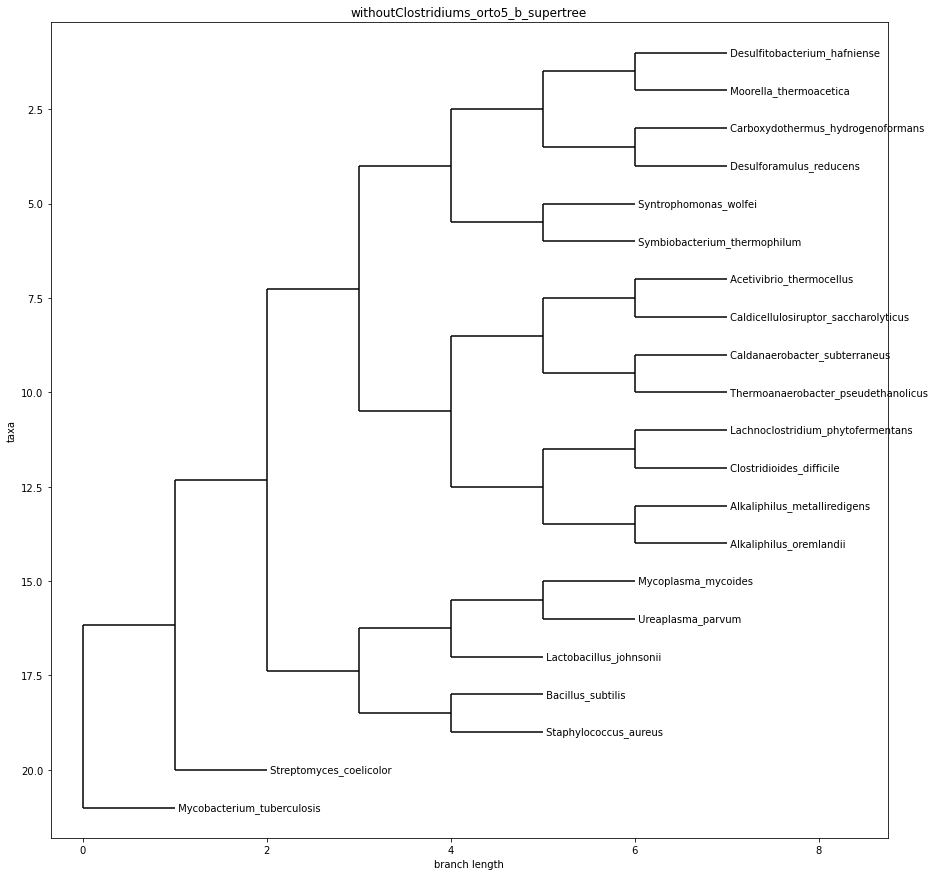

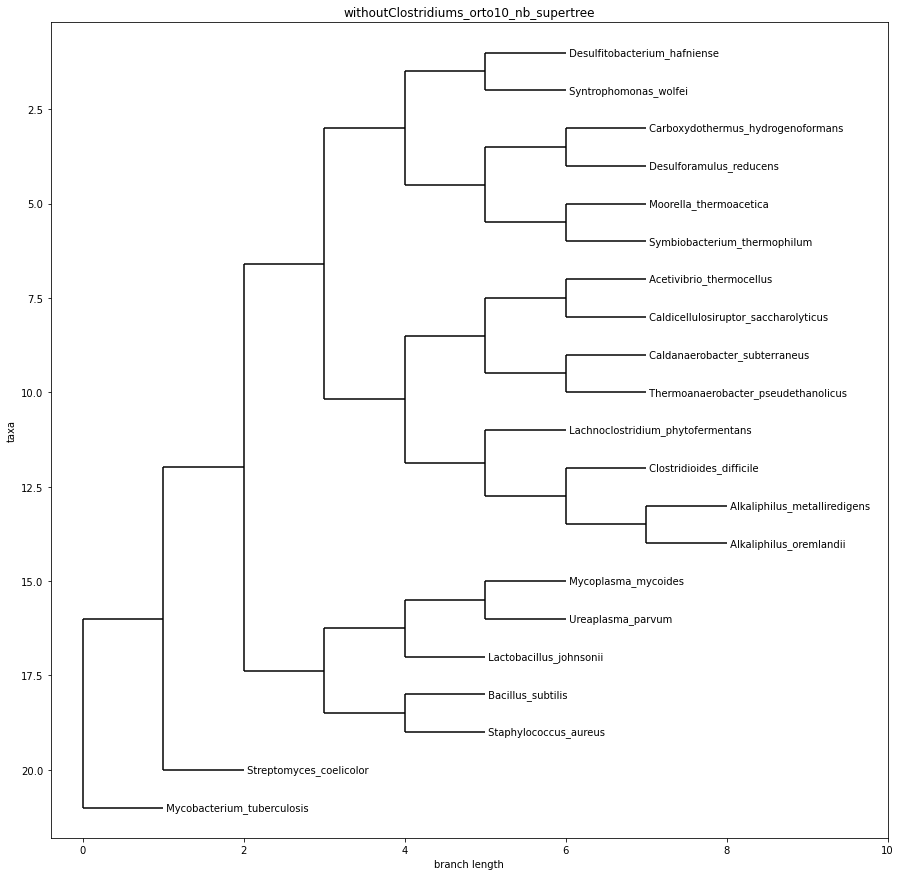

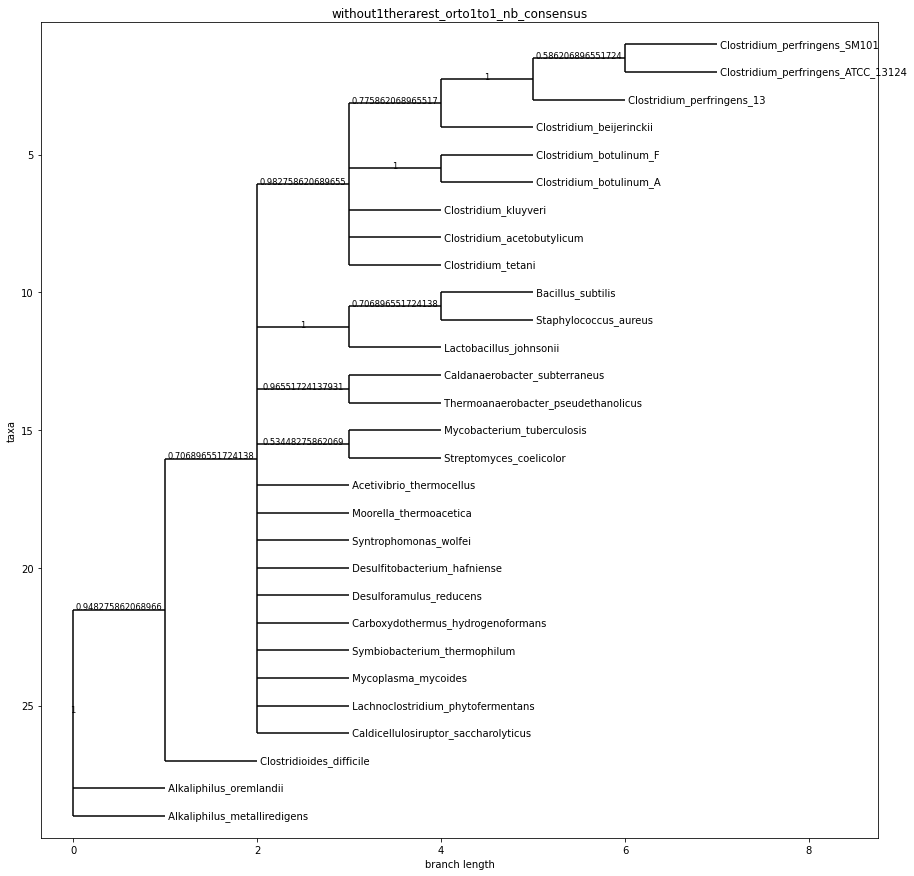

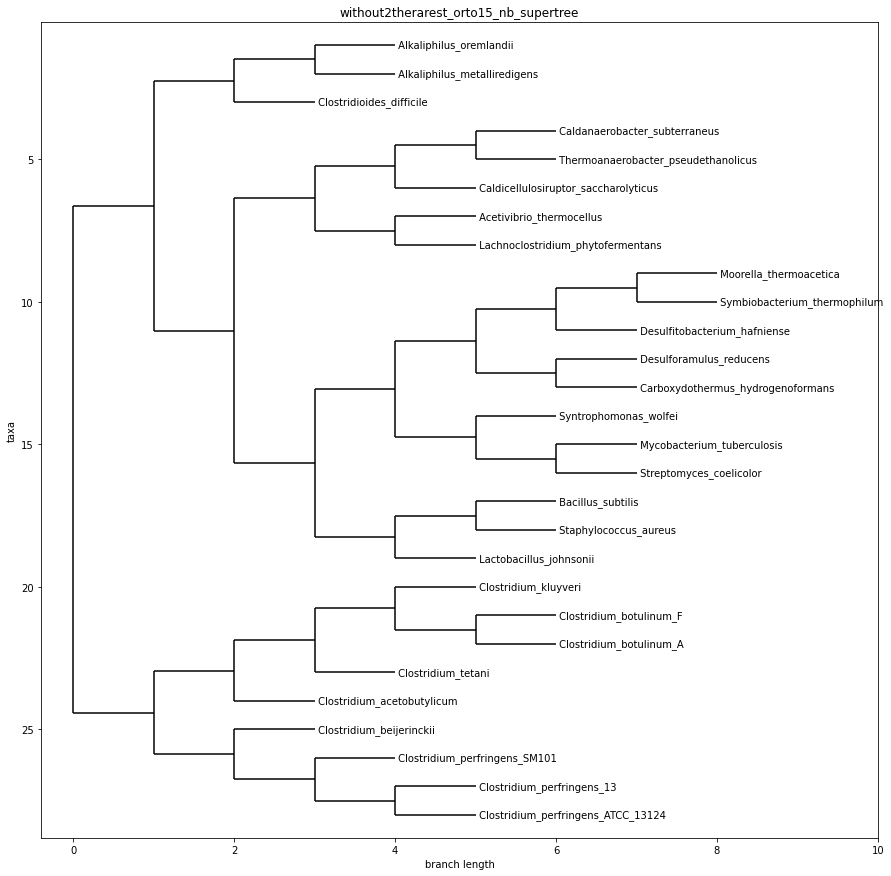

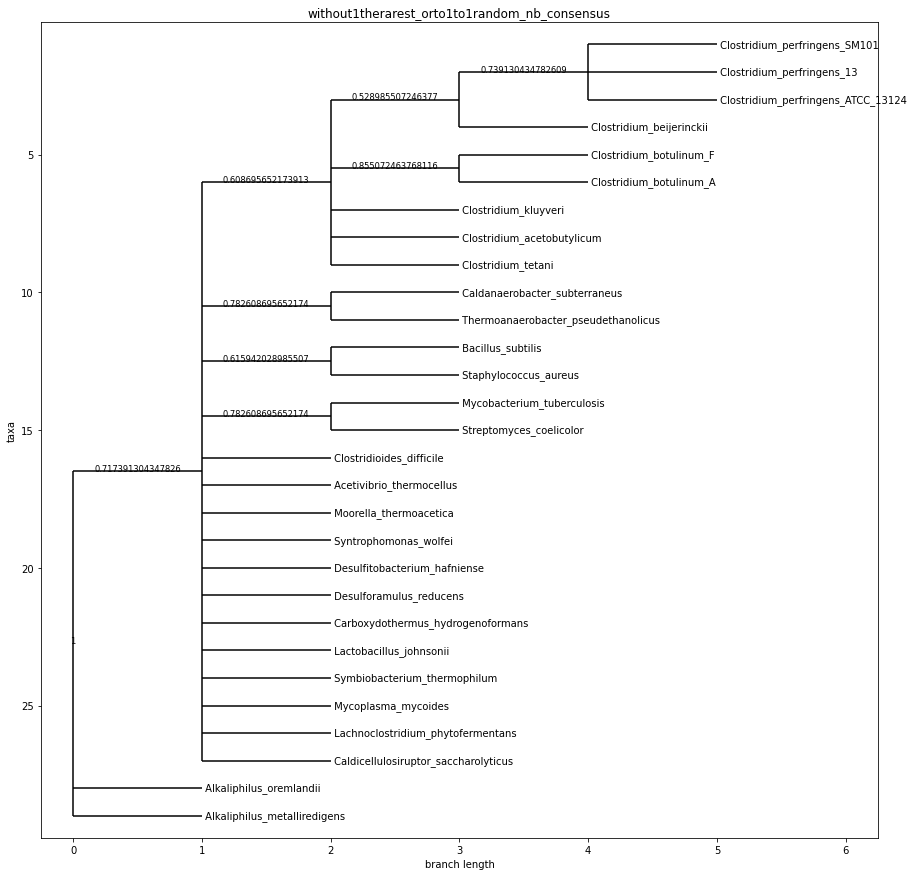

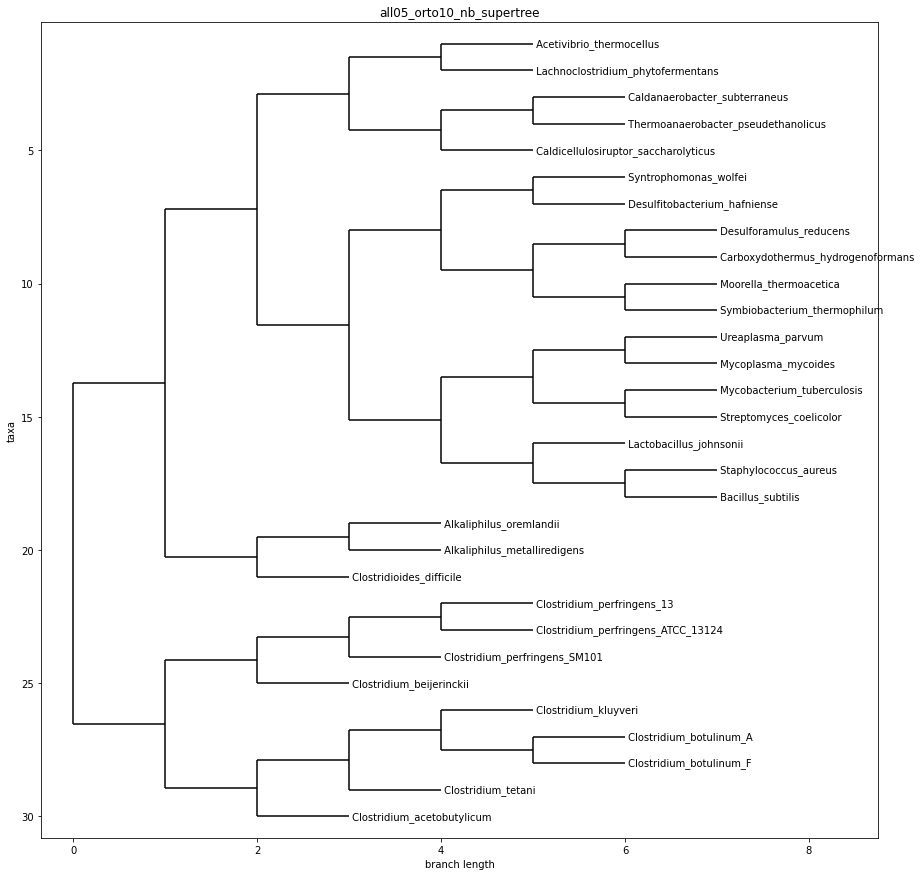

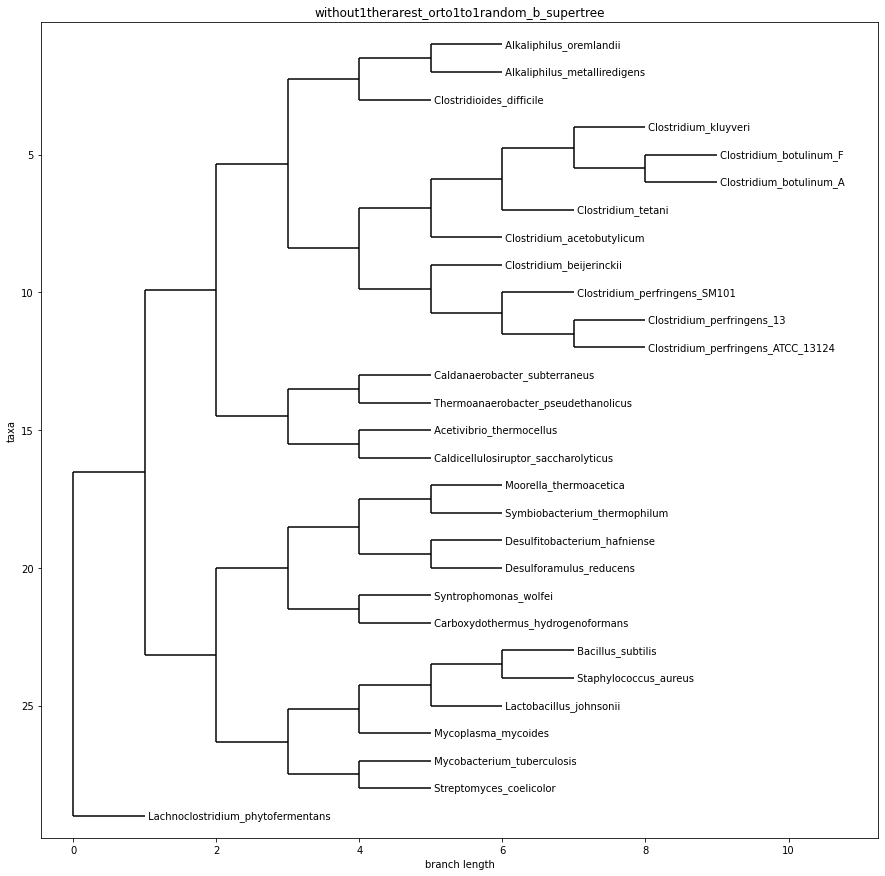

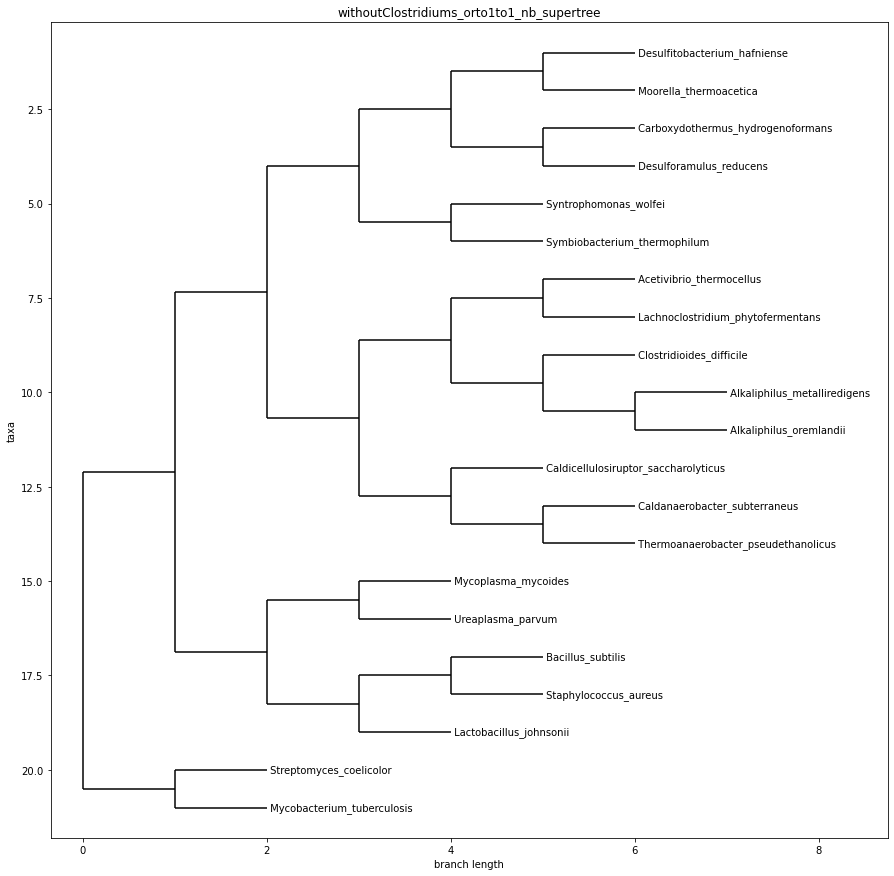

In [24]:
paths = os.listdir('results/final')
for p in paths:
    if "trees1file" not in p:
        tree = Phylo.read('results/final/'+p, 'newick')
        fig = plt.figure(figsize=(15, 15))
        axes = fig.add_subplot(1, 1, 1)
        Phylo.draw(tree, axes=axes, do_show=False)
        p = p.split('.')[:-1]
        p = '.'.join(p)
        plt.title(p)
        plt.savefig('results/final_plots/'+p+'.png')

In [30]:
with open('results/rf.txt', 'w') as file:
    for p in paths:
        if "trees1file" not in p and 'ref' not in p and 'all' in p:
            
            tree = Tree('results/final/'+p)
            ref = Tree('results/final/ref_tree.nwk')
            comparision = ref.compare(tree, unrooted=True)
            rf = comparision['rf']
            file.write(f'Robinson-Foulds distance for {p}: {rf}\n')
            file.write(f'Robinson-Foulds distance for {p}: {comparision["norm_rf"]}\n')
            file.write('-'*10+'\n')
            # except:
            #     file.write(f'Błąd dla {p}\n')
            #     file.write('-'*10+'\n')